In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


추천 track list로 받기

In [46]:
f = open("./gwang/recommendsTest4.txt", 'r')
track_lists = []
line = f.readline()
track_lists.append(line.split("@"))

f.close()
final_lists = []

for li in track_lists[0]:
    final_lists.append(li.split(","))


In [47]:
final_lists
max_ = -1
cnt = [0 for i in range(500)]
for i in range(len(final_lists)):
    if max_ < len(final_lists[i]):
        max_= len(final_lists[i])
    cnt[len(final_lists[i])]+=1
print(cnt)
print(max_)

[0, 45529, 985, 508, 229, 256, 157, 87, 101, 89, 67, 36, 29, 24, 18, 20, 13, 7, 12, 3, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [48]:
f = open("./gwang/real_test_transactions.txt", 'r')
track_lists = []
while True:
    line = f.readline()
    if not line: break
    track_lists.append(line.split(","))
f.close()
cnt = 0
for li in track_lists:
    li[len(li)-1] = li[len(li)-1][:-2]
len(track_lists)  

48175

In [49]:
final_lists.pop() # 마지막 빈칸 빼기

len(final_lists)

48175

In [50]:
final_lists[0]

['None']

In [51]:
for i in range(len(final_lists)):
    final_lists[i] = list(set(final_lists[i]))  # 중복 제거 

In [52]:
final_lists[0]

['None']

test값으로 track 처음 10개만 주어진다고 가정

In [53]:


def r_precision(recommend_track, real_track):
    r_precision_list = []
    cnt1 = 0
    for i in range(len(recommend_track)):
        cnt = 0
        #if 'None' in recommend_track[i][0]: #추천값이 없으면 skip
            #cnt1+=1
            #continue
        if len(real_track[i]) == 10: #track 개수가 10개이면 skip
            continue
        for j in range(10, len(real_track[i])): #추천하는 트랙과 실제 트랙의 교집합 개수
            if(real_track[i][j] in recommend_track[i][0:len(real_track[i])-10]):
                cnt+=1
        #if(len(real_track[i])-10 < len(recommend_track[i])):
            #r_precision_list.append(cnt*1.0 / (len(real_track[i])-10))
        #else:
            #r_precision_list.append(cnt*1.0 / (len(recommend_track[i])))
        r_precision_list.append(cnt*1.0 / (len(real_track[i])-10))
    print(np.mean(r_precision_list))
    print(cnt1)
    
r_precision(final_lists, track_lists)

0.0013231809511823791
0


In [351]:
r_precision_list = []

for i in range(len(final_lists)):
    cnt = 0
    if 'None' in final_lists[i][0]: #추천값이 없으면 skip
        continue
    if len(track_lists[i]) == 10: #track 개수가 10개이면 skip
        continue
    for j in range(11, len(track_lists[i])): #추천하는 트랙과 실제 트랙의 교집합 개수
        if(track_lists[i][j] in final_lists[i][0:len(track_lists[i])-10]):
            cnt+=1
    if(len(track_lists[i])-10 < len(final_lists[i])):
        r_precision_list.append(cnt*1.0 / (len(track_lists[i])-10))
    else:
        r_precision_list.append(cnt*1.0 / (len(final_lists[i])))

print(np.mean(r_precision_list))
    

0.25710599482291213


In [352]:
f = open("./gwang/recommends.txt", 'r')
track_lists2 = []
line = f.readline()

track_lists2.append(line.split("@"))

f.close()
final_lists2 = []

for li in track_lists2[0]:
    final_lists2.append(li.split(","))
    

In [353]:
final_lists2

[['spotify:track:5XJJdNPkwmbUwE79gv0NxK',
  'spotify:track:5Q0Nhxo0l2bP3pNjpGJwV1',
  'spotify:track:0WqIKmW4BTrj3eJFmnCKMv',
  'spotify:track:5KY7zgFeH2GWoL1zP9mME6',
  'spotify:track:7iL6o9tox1zgHpKUfh9vuC',
  'spotify:track:5XJJdNPkwmbUwE79gv0NxK',
  'spotify:track:0XUfyU2QviPAs6bxSpXYG4'],
 ['spotify:track:0J6mQxEZnlRt9ymzFntA6z',
  'spotify:track:4bHsxqR3GMrXTxEPLuK5ue'],
 ['spotify:track:7GX5flRQZVHRAGd6B4TmDO',
  'spotify:track:6mapJIPnQ23RTAevUoE0DL',
  'spotify:track:2ANLarE8yHVsLWW21nj79M',
  'spotify:track:1f5cbQtDrykjarZVrShaDI',
  'spotify:track:3a1lNhkSLSkpJE4MSHpDu9',
  'spotify:track:4Km5HrUvYTaSUfiSGPJeQR',
  'spotify:track:6fwdbPMwP1zVStm8FybmkO',
  'spotify:track:0SGkqnVQo9KPytSri1H6cF',
  'spotify:track:5yuShbu70mtHXY0yLzCQLQ',
  'spotify:track:0VgkVdmE4gld66l8iyGjgx',
  'spotify:track:6gBFPUFcJLzWGx4lenP6h2',
  'spotify:track:2EEeOnHehOozLq4aS0n6SL',
  'spotify:track:7KXjTSCq5nL1LoYtL7XAwS',
  'spotify:track:20dP2DaMHIAmwWAbp7peSr',
  'spotify:track:0pSBuHjILhNEo55

In [354]:
len(final_lists2)

9651

In [355]:
final_lists2.pop()

['']

In [336]:
len(final_lists2)

9650

In [338]:
for i in range(len(final_lists2)):
    final_lists2[i] = list(set(final_lists2[i]))  # 중복 제거 

In [341]:
r_precision(final_lists2, track_lists)

0.217745713758621


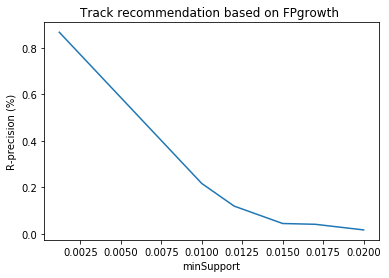

In [112]:

minSup = [0.0012,0.01,0.012,0.015,0.017,0.02]
r_pre = [0.8674682497,0.2168003117512298,0.1194514310984497,0.04455235472443116,0.04122852165290114,0.016997703660284034]
plt.title("Track recommendation based on FPgrowth ")
plt.xlabel("minSupport")
plt.ylabel("R-precision (%)")
plt.plot(minSup,r_pre)